In [127]:
import cv2
import numpy as np
from typing import Union
import matplotlib.pyplot as plt


In [128]:
def rotate_image(
    image: np.array,
    angle: Union[int, float]) -> np.array:
    """
    Rotates an image by a specified angle using linear matrix transformation.

    Parameters:
    -----------
    image: np.array
        The input image as a matrix.
    angle: number
        The angle of rotation in degrees (positive for counter-clockwise).

    Returns:
    --------
    np.array: The rotated image as a matrix.
    """
    height, width = image.shape[:2]
    theta = np.radians(angle)

    rotation_matrix = np.float32([
        [np.cos(theta), -np.sin(theta), 0],
        [np.sin(theta),  np.cos(theta), 0],
        [0,               0,            1]])

    center = (width / 2, height / 2)

    # Translation matrix to move image to origin, perform rotation, 
    # then move back to original position
    translation_matrix = np.float32([
        [1, 0, -center[0]],
        [0, 1, -center[1]],
        [0, 0, 1]])

    inverse_translation_matrix = np.float32([
        [1, 0, center[0]],
        [0, 1, center[1]],
        [0, 0, 1]])

    transform_combination = np.matmul(inverse_translation_matrix, np.matmul(rotation_matrix, translation_matrix))
    rotated_image = cv2.warpPerspective(image, transform_combination, (width, height))
    return rotated_image


def shear_image(
    image: np.array,
    shear_x: float=0.2,
    shear_y: float=0):
    """
    Shears an image along x and y directions using linear matrix transformation.

    Parameters:
    -----------
    image: np.array
        The input image as a matrix.
    shear_x: float
        The amount of shear along the x-axis (positive for right shear).
    shear_y: float
        The amount of shear along the y-axis (positive for bottom shear).

    Returns:
    --------
    np.array: The sheared image as a matrix.
    """
    height, width = image.shape[:2]

    shear_matrix = np.float32([
        [   1,   shear_x,   0],
        [shear_y,   1,      0],
        [   0,      0,      1]])
    sheared_image = warpPerspective(image, shear_matrix, (height,width))
    return sheared_image
  
def warpPerspective(image, M, dsize):
    h, w = dsize  # Altura e largura da imagem de saída
    output = np.zeros((h, w), dtype=image.dtype)  # Inicializa a imagem de saída com zeros
    
    M_inv = np.linalg.inv(M)  # Calcula a inversa da matriz de transformação
    
    for y in range(h):  # Percorre cada linha da imagem de saída
        for x in range(w):  # Percorre cada coluna da imagem de saída
            dest_coords = np.array([x, y, 1])  # Coordenadas homogêneas do pixel de destino
            src_coords = M_inv @ dest_coords  # Calcula as coordenadas correspondentes na imagem de origem
            src_x, src_y = src_coords[0] / src_coords[2], src_coords[1] / src_coords[2]  # Converte para coordenadas cartesianas
            
            # Verifica se as coordenadas mapeadas estão dentro dos limites da imagem de origem
            if 0 <= src_x < image.shape[1] and 0 <= src_y < image.shape[0]:
                x0, y0 = int(src_x), int(src_y)  # Ponto superior esquerdo
                x1, y1 = min(x0 + 1, image.shape[1] - 1), min(y0 + 1, image.shape[0] - 1)  # Ponto inferior direito
                
                dx, dy = src_x - x0, src_y - y0  # Deslocamentos fracionários
                
                # Realiza a interpolação bilinear
                output[y, x] = (
                    image[y0, x0] * (1 - dx) * (1 - dy) +
                    image[y0, x1] * dx * (1 - dy) +
                    image[y1, x0] * (1 - dx) * dy +
                    image[y1, x1] * dx * dy
                )
    return output



def contract_image(
    image: np.array,
    scale_factor: float):
    """
    Contracts an image using linear scaling.

    Parameters:
    -----------
    image: np.array
        The input image as a matrix.
    scale_factor: float
        The scaling factor (0 to 1, smaller for more contraction).

    Returns:
        The contracted image as a NumPy array.
    """
    height, width = image.shape[:2]
    new_size = (int(width * scale_factor), int(height * scale_factor))
    contracted_image = cv2.resize(image, new_size, interpolation=cv2.INTER_LINEAR)
    return contracted_image


def floating_point_error(
    image: np.array,
    transformed_image: np.array,
    title: str = "Floating Point Error",
    resize_transformed: bool = True):

    original_image_float = image.astype(np.float32)

    # Resize processed image to original size for comparison
    if resize_transformed:
        transformed_image = cv2.resize(
            transformed_image, image.shape[::-1], interpolation=cv2.INTER_LINEAR)

    processed_image_float = transformed_image.astype(np.float32)
    floating_point_error = np.abs(original_image_float - processed_image_float)

    plt.figure(figsize=(6, 6))
    plt.title(title)
    plt.imshow(floating_point_error, cmap='hot')
    plt.axis('off')

    mean_floating_point_error = np.mean(floating_point_error)
    mean_error_str = f"Mean Error: {mean_floating_point_error:.2f}"

    legend_handle = plt.plot([], [], label=mean_error_str)
    plt.legend(handles=legend_handle, loc=(0, -0.15))

    plt.colorbar()
    plt.show()

In [129]:
image_path = "./test.png"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
original_image

array([[192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       ...,
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19]], dtype=uint8)

In [130]:
original_image

array([[192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       ...,
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19]], dtype=uint8)

#### Contracting image

In [131]:
transformed_image = original_image.copy()
transformed_image = contract_image(
    transformed_image, 0.7)
transformed_image

array([[192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       [192, 192, 192, ...,  72,  72,  72],
       ...,
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19],
       [ 39,  39,  39, ...,  19,  19,  19]], dtype=uint8)

In [132]:
transformed_image.shape

(105, 140)

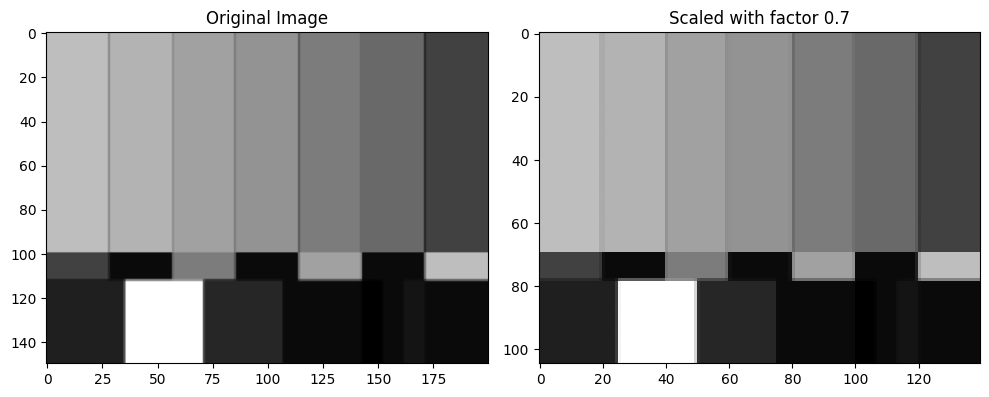

In [133]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(transformed_image, cmap="gray")
ax2.set_title("Scaled with factor 0.7")

plt.tight_layout()
plt.show()

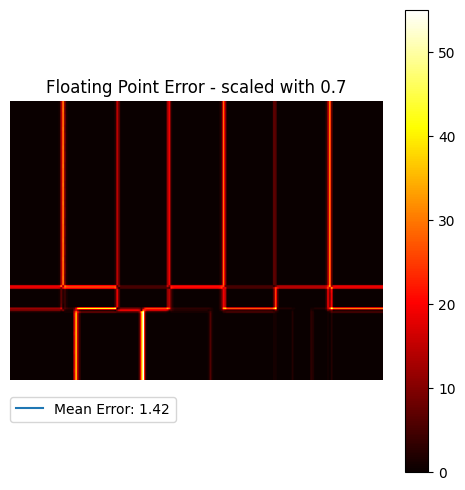

In [134]:
floating_point_error(
    original_image,
    transformed_image,
    title="Floating Point Error - scaled with 0.7")

In [135]:
transformed_image = original_image.copy()
for _ in range(10):
    transformed_image = contract_image(
        transformed_image, 0.9)
    transformed_image = contract_image(
        transformed_image, 1.1)

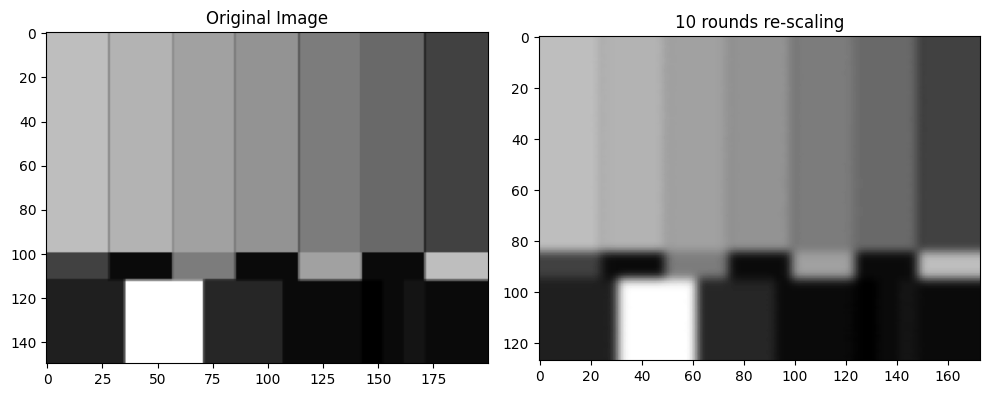

In [136]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(transformed_image, cmap="gray")
ax2.set_title("10 rounds re-scaling")

plt.tight_layout()
plt.show()

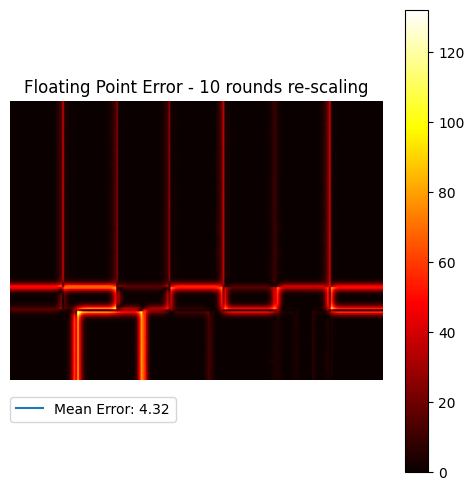

In [137]:
floating_point_error(
    original_image,
    transformed_image,
    title="Floating Point Error - 10 rounds re-scaling")

#### Shear image

In [138]:
shear_scaler_x = 0.03
original_image.shape

(150, 200)

In [139]:
transformed_image = original_image.copy()
transformed_image = shear_image(
    transformed_image, shear_scaler_x)
transformed_image

array([[192, 192, 192, ...,  72,  72,  72],
       [  0, 192, 192, ...,  72,  72,  72],
       [  0, 192, 192, ...,  72,  72,  72],
       ...,
       [  0,   0,   0, ...,  19,  19,  19],
       [  0,   0,   0, ...,  19,  19,  19],
       [  0,   0,   0, ...,  19,  19,  19]], dtype=uint8)

In [140]:
transformed_image.shape

(150, 200)

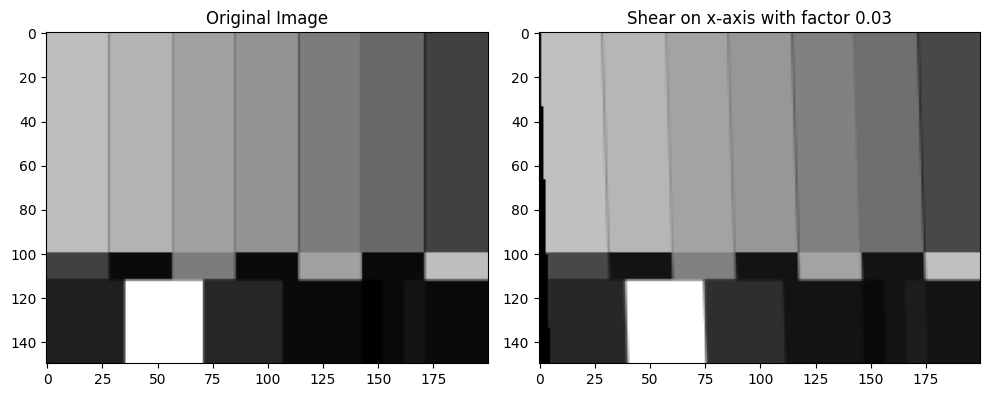

In [141]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(transformed_image, cmap="gray")
ax2.set_title(f"Shear on x-axis with factor {shear_scaler_x}")

plt.tight_layout()
plt.show()

In [142]:
transformed_image = shear_image(
    transformed_image, -shear_scaler_x)
transformed_image

array([[192, 192, 192, ...,  72,  72,  72],
       [  5, 192, 192, ...,  72,  72,  72],
       [ 11, 192, 192, ...,  72,  72,  72],
       ...,
       [ 15,  39,  39, ...,   0,   0,   0],
       [ 17,  39,  39, ...,   0,   0,   0],
       [ 18,  39,  39, ...,   0,   0,   0]], dtype=uint8)

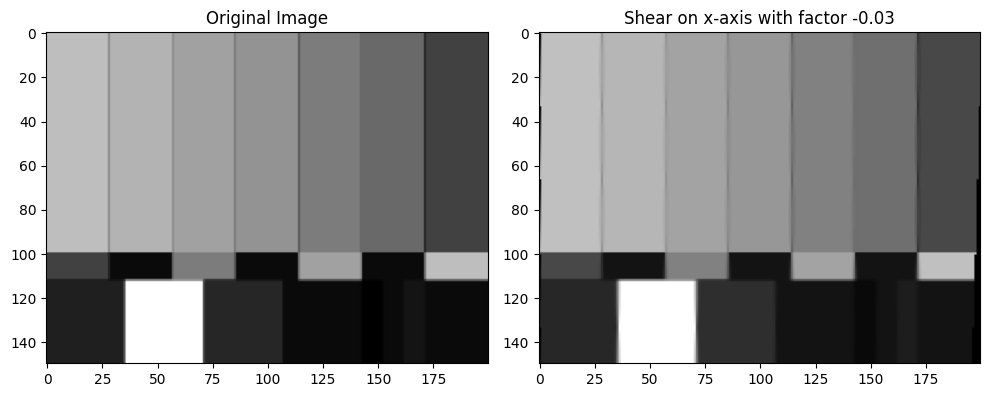

In [143]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(transformed_image, cmap="gray")
ax2.set_title(f"Shear on x-axis with factor -{shear_scaler_x}")

plt.tight_layout()
plt.show()

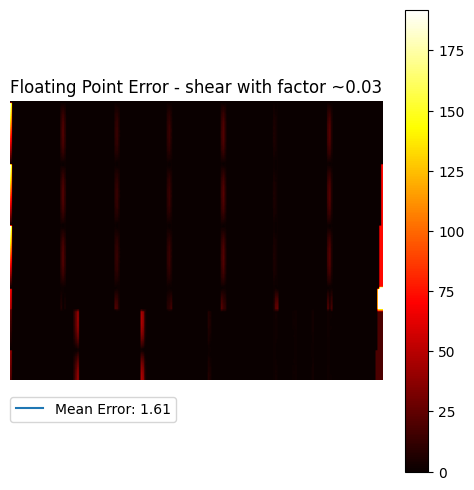

In [144]:
floating_point_error(
    original_image,
    transformed_image,
    title=f"Floating Point Error - shear with factor ~{shear_scaler_x}")

#### Rotate image

In [145]:
angle = 180

In [146]:
transformed_image = original_image.copy()
transformed_image = rotate_image(
    transformed_image, angle)
transformed_image

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,  19,  19, ...,  39,  39,  39],
       [  0,  19,  19, ...,  39,  39,  39],
       ...,
       [  0,  72,  72, ..., 192, 192, 192],
       [  0,  72,  72, ..., 192, 192, 192],
       [  0,  72,  72, ..., 192, 192, 192]], dtype=uint8)

In [147]:
transformed_image.shape

(150, 200)

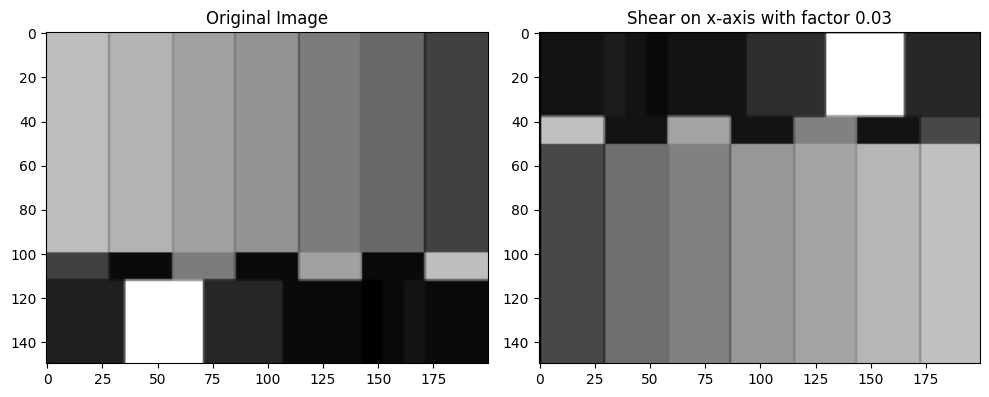

In [148]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.imshow(original_image, cmap="gray")
ax1.set_title("Original Image")

ax2.imshow(transformed_image, cmap="gray")
ax2.set_title(f"Shear on x-axis with factor {shear_scaler_x}")

plt.tight_layout()
plt.show()

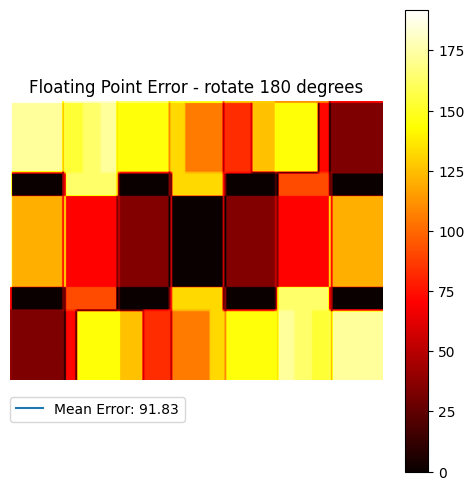

In [149]:
floating_point_error(
    original_image,
    transformed_image,
    title=f"Floating Point Error - rotate {angle} degrees",
    resize_transformed=False)

In [150]:
transformed_image = rotate_image(
    transformed_image, angle)

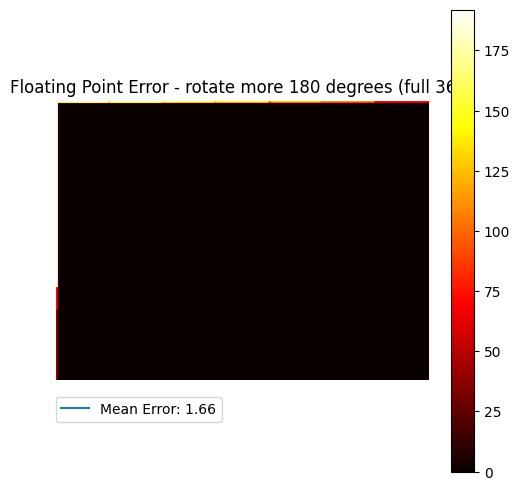

In [151]:
floating_point_error(
    original_image,
    transformed_image,
    title=f"Floating Point Error - rotate more {angle} degrees (full 360)",
    resize_transformed=False)